# Experiment development

Our main question is, under what conditions are covert signalling or churlishness strategies better than overt signaling and generousness?

In our experiments we will vary parameter settings to see, e.g., whether different levels of homophily make covert/churlish strategies more beneficial than the alternative. 

First, I review the results from "The Evolution of Covert Signaling" that answer our question. Then I will explain how to convert that to an agent-based model.

According to Paul's "summary of results" in his slides from CES 2017, covert signaling evolves when

1. Generous receiving is also favored... 
    - When signals are sufficiently noisy
    - Assortment under free choice isn't too efficient 
    - ...how to translate these to our ABM?
1. Forced choice scenarios are common (i.e. $w \approx 0$)
1. Similarity is low (?)
1. Cost of being disliked is high ($d$ and $\delta$ large)

But I'd like to understand a little better how these are implemented in the paper/analytical model, especially

1. How to represent noisy signaling in the ABM model and what is the mechanism for setting assortment "efficiency"? 
1. What does it mean that "similarity is low"?

One first step would be to write out again the differences between "like" and "dislike" and "similar" and "dissimilar".

### Like and dislike (and neutral)

These are "attitudes" in the id-sig model. A focal agent develops an attitude towards another agent when that focal agent receives a signal from that other agent.

The signal an agent sends is the trait vector. In the case of covert signaling, however, only similar agents receive the message that they are, in fact similar. Although they may have never interacted before, somehow an honest signal only goes through to similar agents. Other agents "ignore" the signal.

In the paper it seems the proportion $r < R$ who receive a covert signal are only similar ones. In the model writeup I'm implementing, I believe the idea was $r$ of the whole population would recieve the signal, but only similar agents would update their attitude to Like. 

![](Figure1_IdSigPaper.png)

Is it the case now that dissimilar agents change to "Neutral" on hearing a covert signal? Say, for example, a Churlish agent receives a covert signal from a previously unknown other. Does it change its attitude towards the unknown other from dislike to neutral?

On a practical note, double check the implementation of determining similarity. I had a flash of doubt, maybe it is not correct.


### Similar and dissimilar

When agents assort and interact, the interaction probability and payoff are both only a function of attitude like/dislike/neutral.

In "ECS" there is a parameter $s$ that we do not use here--we do have a parameter $s$, but is the payoff bonus for two interacting agents to be similar. In the paper, $s$ represents the "baseline rate of similarity". Because the population $N \to \infty$ in the evolutionary model of ECS, it is not necessary to explicitly model traits. In this way, one has a more realistic picture of similarity than what is in the ABM currently. Specifically, $s$ can be greater or less than 0.5, which is realistic in that we probably would not say we are similar with half the world, maybe it's a small fraction of people in the world with whom we are similar. On the other hand, in work settings for example, the proportion is much higher, perhaps 0.9+. 

In the ABM, $s \approx 0.5$ since similarity between agents $i$ and $j$ is determined by their trait vectors $\tau_i$ and $\tau_j$, each of which have $K$ components, where each component is written $\tau_{ik}$. Similarity is defined 

$$
\text{sim}_{ij} = \begin{cases}
    1 & \text{if } \sum_{k=1}^K \tau_{ik} \tau_{jk} > 0\\
    -1 & \text{otherwise.}
    \end{cases}
$$

By setting $K$ to be odd, we can guarantee $\sum_{k=1}^K \tau_{ik} \tau_{jk}$ is never zero.

## Notes from "ECS" results

These points are from the first paragraph of the section "Analysis and Results" in ECS.

1. Covert signals require a sufficient proportion of receivers to default to neutral attitudes. Default disliking means covert signals produce no benefit.
1. Covert signals require the cost of being disliked in the forced choice to be sufficiently high. This means the prob of similarity ($s$ in ECS) must be sufficiently low to increase the "risk of being disliked by dissimilar individuals."
1. Overt signalers cannot have too large an advantage in free choice. This means accuracy of assortment not be too accurate. "[A]ccuracy of assortment is influenced by the reception probabilities of both signal types, $R$ and $r$, as well as the proportional odds assortment factors, $w_L$ and $w_D$. 

Some notes on this. First, I think we should have the proportion of initial churlish agents be a parameter and not something that can evolve, for starters, since the results seem to focus on that. But the results also feature the evolution of churlishness (y-axis in Figure 2 of model dynamics). In fact, the first point above casts receiving strategy as a parameter to be set, not to evolve. So I think it should be the case that, for our initial experiments, only signaling strategy evolves.

Second, we could set a similarity threshold that will indirectly/approximately set $s$. That is, instead of having the condition for $\text{sim}_{ij} = 1$ to be greater than zero, set it to be $S$:

$$
\text{sim}_{ij} = \begin{cases}
    1 & \text{if } \sum_{k=1}^K \tau_{ik} \tau_{jk} > S\\
    -1 & \text{otherwise.}
    \end{cases}
$$

Finally, we can change accuracy of assortment by the reception probabilities $R$ and $r$, and the homophily parameter, $w$.

## First experiment: evolution of covert signalling as a function of $r$

Unit testing helped fix a number of bugs, and now there are tests in the `test` directory. Model and experiments are in `id_signaling`. 

I am suppressing receiving strategy evolution to try to get a handle on signaling strategy evolution first, make sure that is working as expected.

In [27]:
from id_signaling.experiment import (
    analyze_covert_receiving_prob, vary_covert_receiving_prob
)

res = vary_covert_receiving_prob(
    covert_rec_probs=[0.1, 0.25, 0.45], 
    similarity_benefit=0.4
)

Covert receiving probability: 0.1
Trial 1 / 10
Covert receiving probability: 0.1
Trial 2 / 10
Covert receiving probability: 0.1
Trial 3 / 10
Covert receiving probability: 0.1
Trial 4 / 10
Covert receiving probability: 0.1
Trial 5 / 10
Covert receiving probability: 0.1
Trial 6 / 10
Covert receiving probability: 0.1
Trial 7 / 10
Covert receiving probability: 0.1
Trial 8 / 10
Covert receiving probability: 0.1
Trial 9 / 10
Covert receiving probability: 0.1
Trial 10 / 10
Covert receiving probability: 0.25
Trial 1 / 10
Covert receiving probability: 0.25
Trial 2 / 10
Covert receiving probability: 0.25
Trial 3 / 10
Covert receiving probability: 0.25
Trial 4 / 10
Covert receiving probability: 0.25
Trial 5 / 10
Covert receiving probability: 0.25
Trial 6 / 10
Covert receiving probability: 0.25
Trial 7 / 10
Covert receiving probability: 0.25
Trial 8 / 10
Covert receiving probability: 0.25
Trial 9 / 10
Covert receiving probability: 0.25
Trial 10 / 10
Covert receiving probability: 0.45
Trial 1 / 10


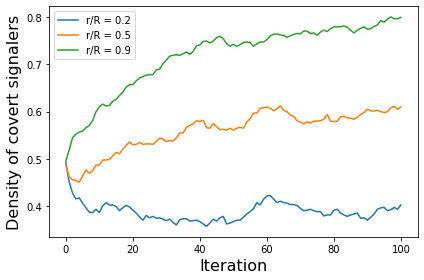

In [38]:
analyze_covert_receiving_prob(res)
plt.xlabel('Iteration', size=16)
plt.ylabel(r'Density of covert signalers', size=16)
plt.legend()

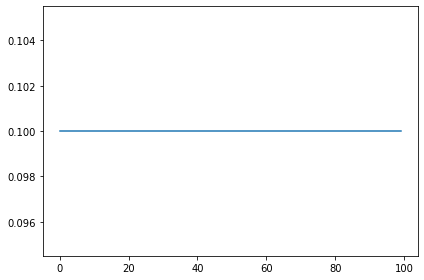

In [24]:
res.keys()
meanp1 = res[0.1].mean(axis=0)
plt.plot(meanp1)